In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### PULLING IN TABLES

In [2]:
ed_2016 = pd.read_csv('organized_data/us_births_2016_ed_counts.csv')
ed_2017 = pd.read_csv('organized_data/us_births_2017_ed_counts.csv')
ed_2018 = pd.read_csv('organized_data/us_births_2018_ed_counts.csv')
ed_2019 = pd.read_csv('organized_data/us_births_2019_ed_counts.csv')
ed_2020 = pd.read_csv('organized_data/us_births_2020_ed_counts.csv')

In [3]:
education_2016 = pd.read_csv('actual_data/education_2016.csv')
education_2017 = pd.read_csv('actual_data/education_2017.csv')
education_2018 = pd.read_csv('actual_data/education_2018.csv')
education_2019 = pd.read_csv('actual_data/education_2019.csv')
education_2020 = pd.read_csv('actual_data/education_2020.csv')

### CLEANING CENSUS DATA

In [4]:
education_2016 = education_2016.tail(41).reset_index(drop=True)
education_2017 = education_2017.tail(41).reset_index(drop=True)
education_2018 = education_2018.tail(41).reset_index(drop=True)
education_2019 = education_2019.tail(41).reset_index(drop=True)
education_2020 = education_2020.tail(41).reset_index(drop=True)

In [5]:
education_2016['United States!!Estimate']=education_2016['United States!!Estimate'].str.replace(',','').astype(int)
education_2017['United States!!Estimate']=education_2017['United States!!Estimate'].str.replace(',','').astype(int)
education_2018['United States!!Estimate']=education_2018['United States!!Estimate'].str.replace(',','').astype(int)
education_2019['United States!!Estimate']=education_2019['United States!!Estimate'].str.replace(',','').astype(int)
education_2020['United States!!Estimate']=education_2020['United States!!Estimate'].str.replace(',','').astype(int)

In [6]:
education_2016 = education_2016.rename(columns = {'Label (Grouping)': 'ed_level','United States!!Estimate':'us_total'})
education_2017 = education_2017.rename(columns = {'Label (Grouping)': 'ed_level','United States!!Estimate':'us_total'})
education_2018 = education_2018.rename(columns = {'Label (Grouping)': 'ed_level','United States!!Estimate':'us_total'})
education_2019 = education_2019.rename(columns = {'Label (Grouping)': 'ed_level','United States!!Estimate':'us_total'})
education_2020 = education_2020.rename(columns = {'Label (Grouping)': 'ed_level','United States!!Estimate':'us_total'})

In [7]:
education_2016.ed_level = education_2016.ed_level.str.strip()
education_2017.ed_level = education_2017.ed_level.str.strip()
education_2018.ed_level = education_2018.ed_level.str.strip()
education_2019.ed_level = education_2019.ed_level.str.strip()
education_2020.ed_level = education_2020.ed_level.str.strip()

### CALCS

In [8]:
education_levels_2016 = education_2016.groupby('ed_level')['us_total'].sum().tail(8).to_frame().reset_index().drop(index=[3]).reset_index(drop=True)

In [9]:
education_levels_2017 = education_2017.groupby('ed_level')['us_total'].sum().tail(8).to_frame().reset_index().drop(index=[3]).reset_index(drop=True)

In [10]:
education_levels_2018 = education_2018.groupby('ed_level')['us_total'].sum().tail(8).to_frame().reset_index().drop(index=[3]).reset_index(drop=True)

In [11]:
education_levels_2019 = education_2019.groupby('ed_level')['us_total'].sum().tail(8).to_frame().reset_index().drop(index=[3]).reset_index(drop=True)

In [12]:
education_levels_2020 = education_2020.groupby('ed_level')['us_total'].sum().tail(8).to_frame().reset_index().drop(index=[3]).reset_index(drop=True)

In [13]:
education_levels_2016['year'] = 2016
education_levels_2017['year'] = 2017
education_levels_2018['year'] = 2018
education_levels_2019['year'] = 2019
education_levels_2020['year'] = 2020

In [14]:
education_levels_2016['female_pop'] = education_2016.us_total[0]
education_levels_2017['female_pop'] = education_2017.us_total[0]
education_levels_2018['female_pop'] = education_2018.us_total[0]
education_levels_2019['female_pop'] = education_2019.us_total[0]
education_levels_2020['female_pop'] = education_2020.us_total[0]

In [15]:
education_levels_2016['pct_of_females_over_18'] = round(((education_levels_2016.us_total / education_levels_2016.female_pop)*100),2)
education_levels_2017['pct_of_females_over_18'] = round(((education_levels_2017.us_total / education_levels_2017.female_pop)*100),2)
education_levels_2018['pct_of_females_over_18'] = round(((education_levels_2018.us_total / education_levels_2018.female_pop)*100),2)
education_levels_2019['pct_of_females_over_18'] = round(((education_levels_2019.us_total / education_levels_2019.female_pop)*100),2)
education_levels_2020['pct_of_females_over_18'] = round(((education_levels_2020.us_total / education_levels_2020.female_pop)*100),2)

### MERGING

In [16]:
all_year_ed = pd.concat([ed_2016,ed_2017,ed_2018,ed_2019,ed_2020]).reset_index(drop=True)[['ed_code','pct_births','year','age_group']]

In [17]:
all_year_ed = all_year_ed.rename(columns = {'age_group':'ed_level'})

In [18]:
all_year_ed.pct_births = round((all_year_ed.pct_births * 100),2)

In [19]:
ay_ed_levels = pd.concat([education_levels_2016,education_levels_2017,education_levels_2018,education_levels_2019,education_levels_2020])

### VISUALIZATIONS

In [20]:
import matplotlib.ticker as mtick

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '8th grade or less'),
  Text(0, 1, '9th through 12th grade with no diploma'),
  Text(0, 2, 'High school graduate or GED completed'),
  Text(0, 3, 'Some college credit, but not a degree'),
  Text(0, 4, 'Associate degree (AA,AS)'),
  Text(0, 5, 'Bachelor’s degree (BA, AB, BS)'),
  Text(0, 6, 'Master’s degree (MA, MS, MEng, MEd, MSW, MBA)'),
  Text(0, 7, 'Doctorate (PhD, EdD) or Professional Degree (MD, DDS,DVM, LLB, JD)')])

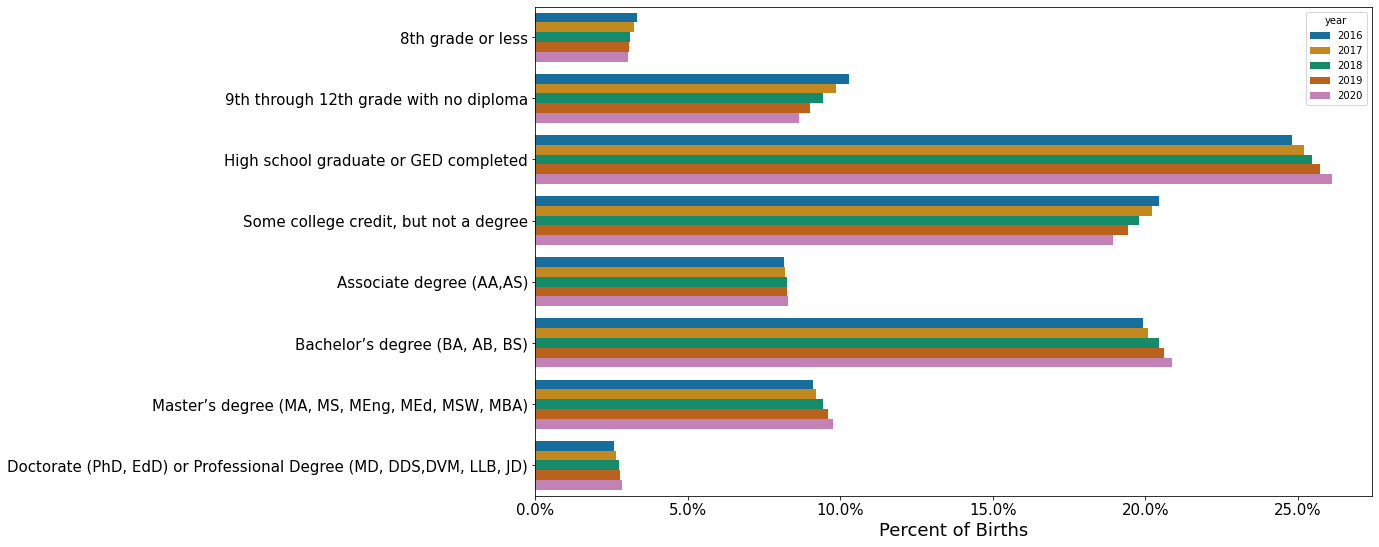

In [21]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(data=all_year_ed,
            y= 'ed_level',
            x= 'pct_births',
            hue = 'year',
            palette = 'colorblind')
ax.xaxis.set_major_formatter('%{x:1f}')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Percent of Births',fontsize = 18)
plt.ylabel('')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [22]:
ay_ed_levels.ed_level = ay_ed_levels.ed_level.str.replace('Less than 9th grade','8th grade or less')

In [23]:
ed_order = ['8th grade or less','9th to 12th grade, no diploma','High school graduate (includes equivalency)','Some college, no degree',
           "Associate's degree","Bachelor's degree",'Graduate or professional degree']

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '8th grade or less'),
  Text(0, 1, '9th to 12th grade, no diploma'),
  Text(0, 2, 'High school graduate (includes equivalency)'),
  Text(0, 3, 'Some college, no degree'),
  Text(0, 4, "Associate's degree"),
  Text(0, 5, "Bachelor's degree"),
  Text(0, 6, 'Graduate or professional degree')])

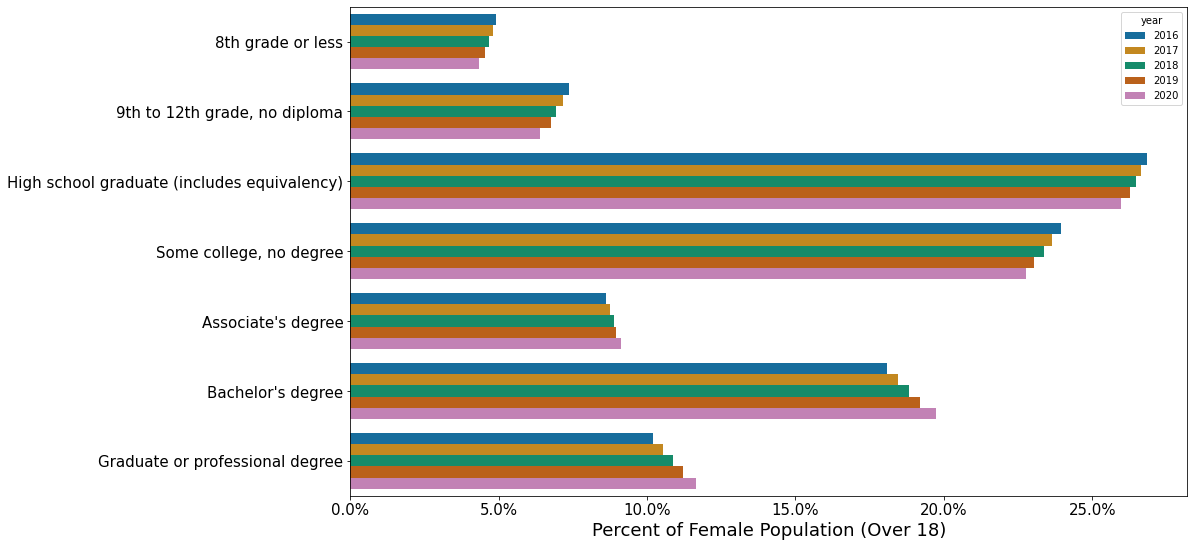

In [24]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(data=ay_ed_levels,
            y= 'ed_level',
            x= 'pct_of_females_over_18',
            hue = 'year',
            palette = 'colorblind',
            orient = 'h',
            order = ed_order)
ax.xaxis.set_major_formatter('%{x:1f}')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.xlabel('Percent of Female Population (Over 18)',fontsize = 18)
plt.ylabel('')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [25]:
all_year_ed.to_csv('viz_tables/all_year_ed.csv')

In [26]:
ay_ed_levels.to_csv('viz_tables/ay_ed_levels.csv')

In [27]:
all_year_ed

,ed_code,pct_births,year,ed_level
0,1,3.35,2016,8th grade or less
1,2,10.30,2016,9th through 12th grade with no diploma
2,3,24.81,2016,High school graduate or GED completed
3,4,20.45,2016,"Some college credit, but not a degree"
4,5,8.16,2016,"Associate degree (AA,AS)"
5,6,19.93,2016,"Bachelor’s degree (BA, AB, BS)"
6,7,9.10,2016,"Master’s degree (MA, MS, MEng, MEd, MSW, MBA)"
7,8,2.60,2016,"Doctorate (PhD, EdD) or Professional Degree (M..."
8,1,3.23,2017,8th grade or less
9,2,9.88,2017,9th through 12th grade with no diploma
